![movieset](movie_set.png)

# Microsoft's Next Move

**Deanna Gould**
***

## Overview

This project is going to go help solve some questions for Microsoft as they start entering the realm of movie production. Since Microsoft hasn't been in the entertainment business in such a way before, Microsoft's executives need to know what is most important in creating a successful movie in order to properly allocate resources. 

The data that I use in this analysis is IMDB data in CSV files. In this analysis, I explore the DataFrames and learn what the DataFrame includes and what some limitations are. Afterward, I clean the data to make sure everything is in proper format, the data types necessary to perform the analysis, and when preparing the data, I start to merge the DataFrames into one. After I've merged everything, I remove anything that isn't needed, and I look at maximum and minimum correlation, as well as plotting some graphs. 

The results were very telling. When comparing genres to worldwide gross, Action earned the most revenue by a considerable amount, followed by Adventure. I then compared directors and sorted directors by worldwide gross as well as rating. This gave lots of insight into which directors have the highest gross, along with their average rating. In addition to that, I compared production budget to worldwide gross. In order to have a successful movie, I would recommend that the movie be an Action movie, with a production budget of at least 2 million, directed by Gail Cronauer or Neil Ruddock.

***

## Business Problem

Microsoft hasn't created any movies yet, and needs three solid recommendations of what to focus resources on. In my experience, some of the best movies had famous directors and extremely expensive budgets, but I also wanted to know if it mattered what genre a movie was. In this analysis, I'm measuring success by worldwide gross and average rating, because Microsoft should be concerned about their ROI along with what people think of the movie. From a business perspective, Microsoft's first movie will be remembered by many, an in order to be taken seriously in the entertainment industry, it will need to be known around the world, as well as having good ratings.


***

## Data Understanding

Importing standard packages for the notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

Here I'm importing the CSV's and creating dataframes for the files.

In [3]:
mvs = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
budg = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
inf = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', index_col=0)
conn = sqlite3.connect('zippedData/im.db')
basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)
mdir = pd.read_sql("""SELECT * FROM directors;""", conn)
ppl = pd.read_sql("""SELECT * FROM persons;""", conn)

**Understanding the basics DataFrame**

In the basics DataFrame, I will be using movie_id, alog with original_title to join tables in the future.

In [4]:
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Now I'd like to know what data types are stored in this DataFrame.

In [5]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


I'd also like to understand some of the statistics in this DataFrame.

In [6]:
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


It's also important to check if there are any null values in the DataFrame.

In [7]:
basics.isna().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

It's really important to note for future reference that there are null values in the original_title column, but not the primary_title column.

After taking a look at the columns and rows, I'm going to look at the shape of the DataFrame as well.

In [8]:
basics.shape

(146144, 6)

**Understanding the ratings DataFrame**

The ratings DataFrame has movie_id which is a unique identifier I can use to join, and I can also use average rating in my analysis.

In [9]:
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Now I'd also like to know what data types are in this DataFrame. 

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In addition to knowing the data types, I'm going to want to know some statistics of the DataFrame as well.

In [11]:
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Now that I know that information, I also need to know how many null values there are.

In [12]:
ratings.isna().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

Great! No null values is awesome. Now, how big is this DataFrame?

In [13]:
ratings.shape

(73856, 3)

**Understanding the mdir DataFrame**

First I want to take a look at the columns and rows in the DataFrame. 

In [14]:
mdir.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Now I know both of these columns are unique identifiers, so I'm not going to look at the statistical information of the DataFrame, but I am still going to verify the data types, as well as if there are any null values.

In [15]:
mdir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


I was expecting an object data type, now I want to make sure there aren't any null values.

In [16]:
mdir.isna().any()

movie_id     False
person_id    False
dtype: bool

No null values in this DataFrame either! I'm going to run shape now so I know how big the DataFrame is that I'm working with.

In [17]:
mdir.shape

(291174, 2)

**Understanding the ppl DataFrame**

I'm going to continue going through some of the basics to explore this DataFrame, and start with head()

In [18]:
ppl.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


Now I'm going to run info, so I know what data types are being stored in this DataFrame.

In [19]:
ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


The ppl DataFrame has information I will use to find the names of directors, based on person_id.Ok, all object data types is what I would expect from this DataFrame. Lastly, I want to know if there are any null values, and how big my DataFrame is. 

In [20]:
ppl.isna().any()

person_id             False
primary_name          False
birth_year             True
death_year             True
primary_profession     True
dtype: bool

There are some null values in the DataFrame, but luckily none of the ones that I will be using for my analysis. Now I'dl like to know how many values I have in the DataFrame, and I'm going to be aware of how many are in some of the other DataFrames.

In [21]:
ppl.shape

(606648, 5)

**Understanding the mvs DataFrame**

Taking a look at the first few rows of the DataFrame to get an understanding of what it looks like. 

In [22]:
mvs.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Looking at what the columns are in the DataFrame and learning their data types.

In [23]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


Getting some of the statistical details of the DataFrame.

In [24]:
mvs.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Finding null values in the DataFrame.

In [25]:
mvs.isna().any()

genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

Getting an idea of how big the DataFrame is, specifically how many rows there are.

In [26]:
mvs.shape

(26517, 9)

**Understanding the budg DataFrame**

Taking a look at the first few rows of the budg DataFrame to get an understanding of what it looks like. 

In [27]:
budg.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Looking at what the columns are in the DataFrame and learning their data types.

In [28]:
budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Getting some of the statistical details of the DataFrame.

In [29]:
budg.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


Finding null values in the DataFrame.

In [30]:
budg.isna().any()

release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

Getting an idea of how big the budg DataFrame is.

In [31]:
budg.shape

(5782, 5)

**Understanding the inf DataFrame**

Taking a look at the first few rows of the DataFrame to get an understanding of what it looks like. 

In [32]:
inf.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Looking at what the columns are in the dataFrame and learning their data types.

In [33]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


Getting some of the statistical details of the DataFrame.

In [34]:
inf.describe()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"32,000,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


Finding null values in the DataFrame. 

In [35]:
inf.isna().any()

synopsis        True
rating          True
genre           True
director        True
writer          True
theater_date    True
dvd_date        True
currency        True
box_office      True
runtime         True
studio          True
dtype: bool

Below I'm inquiring about how many rows are in the DataFrame.

In [36]:
inf.shape

(1560, 11)

***

## Data Preparation

**Merging DataFrames**

I'm going to continue moving through my data in the same way that I imported it. For the first few DataFrames (basics, ratings, mdir, and ppl) I'm going to merge them first, and then clean what is needed. There aren't a lot of columns, and the unique identifiers are very clear.

First, I want to merge mdir and ppl together. I'd like to have a primary_name for every person_id.

In [37]:
dirppl = mdir.merge(ppl, how="left", on='person_id')
dirppl

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0285252,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
3,tt0835418,nm0151540,Jay Chandrasekhar,1968.0,NaN,"director,actor,writer"
4,tt0878654,nm0089502,Albert Pyun,1954.0,NaN,"director,writer,producer"
...,...,...,...,...,...,...
291169,tt8999974,nm10122357,Daysi Burbano,NaN,NaN,"director,writer,cinematographer"
291170,tt9001390,nm6711477,Bernard Lessa,NaN,NaN,"director,writer,cinematographer"
291171,tt9001494,nm10123242,Tate Nova,NaN,NaN,"director,producer"
291172,tt9001494,nm10123248,Courtney Faye Powell,NaN,NaN,"director,producer"


Since I only want some of these columns, specifically movie_id, person_id, and primary_name, I'm going to drop some of the other columns. 

In [38]:
dirppl.drop(['primary_profession', 'death_year', 'birth_year'], axis=1, inplace=True)

Checking the DataFrame after I've dropped the rows.

In [39]:
dirppl

,movie_id,person_id,primary_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0835418,nm0151540,Jay Chandrasekhar
4,tt0878654,nm0089502,Albert Pyun
...,...,...,...
291169,tt8999974,nm10122357,Daysi Burbano
291170,tt9001390,nm6711477,Bernard Lessa
291171,tt9001494,nm10123242,Tate Nova
291172,tt9001494,nm10123248,Courtney Faye Powell


Now that this DataFrame looks good, I'm going to join the basics DataFrame with the ratings DataFrame.

In [40]:
basrat = basics.join(ratings, how="inner", lsuffix="1")
basrat

,movie_id1,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4206656,MarchFourth Marching Band in China,MarchFourth Marching Band in China,2014,66.0,"Documentary,Music",tt9805820,8.1,25
73852,tt4206658,El Bumbún,El Bumbún,2014,85.0,Drama,tt9844256,7.5,24
73853,tt4206724,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,2014,53.0,"Documentary,History,News",tt9851050,4.7,14
73854,tt4207014,Amante de lo ajeno,Amante de lo ajeno,2012,99.0,Drama,tt9886934,7.0,5


With this joined, I'm going to drop some of the columns that I don't need. 

In [41]:
basrat.drop(['movie_id1', 'start_year', 'runtime_minutes'], axis=1, inplace=True)
basrat

,primary_title,original_title,genres,movie_id,averagerating,numvotes
0,Sunghursh,Sunghursh,"Action,Crime,Drama",tt10356526,8.3,31
1,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",tt10384606,8.9,559
2,The Other Side of the Wind,The Other Side of the Wind,Drama,tt1042974,6.4,20
3,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",tt1043726,4.2,50352
4,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...
73851,MarchFourth Marching Band in China,MarchFourth Marching Band in China,"Documentary,Music",tt9805820,8.1,25
73852,El Bumbún,El Bumbún,Drama,tt9844256,7.5,24
73853,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,"Documentary,History,News",tt9851050,4.7,14
73854,Amante de lo ajeno,Amante de lo ajeno,Drama,tt9886934,7.0,5


With this joined, I'm going to double check which columns have null values, so I know to be aware of them.

In [42]:
basrat.isna().any()

primary_title     False
original_title     True
genres             True
movie_id          False
averagerating     False
numvotes          False
dtype: bool

Now, I can join these two DataFrames together that I just created (dirppl and basrat), and then create a new variable for that as well.

In [43]:
df1 = dirppl.join(basrat, how="inner", lsuffix=1)
df1

,movie_id1,person_id,primary_name,primary_title,original_title,genres,movie_id,averagerating,numvotes
0,tt0285252,nm0899854,Tony Vitale,Sunghursh,Sunghursh,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0462036,nm1940585,Bill Haley,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",tt10384606,8.9,559
2,tt0835418,nm0151540,Jay Chandrasekhar,The Other Side of the Wind,The Other Side of the Wind,Drama,tt1042974,6.4,20
3,tt0835418,nm0151540,Jay Chandrasekhar,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",tt1043726,4.2,50352
4,tt0878654,nm0089502,Albert Pyun,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",tt1060240,6.5,21
...,...,...,...,...,...,...,...,...,...
73851,tt4911324,nm1715501,Rory Karpf,MarchFourth Marching Band in China,MarchFourth Marching Band in China,"Documentary,Music",tt9805820,8.1,25
73852,tt4912244,nm7495777,C. Ross Darlington,El Bumbún,El Bumbún,Drama,tt9844256,7.5,24
73853,tt4912310,nm1764581,Eric Friedler,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,"Documentary,History,News",tt9851050,4.7,14
73854,tt4914302,nm3375778,Drew Stewart,Amante de lo ajeno,Amante de lo ajeno,Drama,tt9886934,7.0,5


Since I will be using genre in my analysis, and there are multiple genres occuring in that column, I'm going to explode that field so I can separate it by delimiter. 

**Cleaning genre column**

In [44]:
df1[['genre1', 'genre2', 'genre3']] = df1.genres.str.split(',', expand=True)

Now I want to know what my DataFrame looks like with the genres broken out into their own columns. 

In [45]:
df1.head()

,movie_id1,person_id,primary_name,primary_title,original_title,genres,movie_id,averagerating,numvotes,genre1,genre2,genre3
0,tt0285252,nm0899854,Tony Vitale,Sunghursh,Sunghursh,"Action,Crime,Drama",tt10356526,8.3,31,Action,Crime,Drama
1,tt0462036,nm1940585,Bill Haley,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",tt10384606,8.9,559,Biography,Drama,None
2,tt0835418,nm0151540,Jay Chandrasekhar,The Other Side of the Wind,The Other Side of the Wind,Drama,tt1042974,6.4,20,Drama,None,None
3,tt0835418,nm0151540,Jay Chandrasekhar,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",tt1043726,4.2,50352,Comedy,Drama,None
4,tt0878654,nm0089502,Albert Pyun,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",tt1060240,6.5,21,Comedy,Drama,Fantasy


Since not every movie will have multiple genres, I'm going to look at how many null values there are in each column.

In [46]:
df1['genre3'].isna().sum()

54541

In [47]:
df1['genre2'].isna().sum()

37149

In [48]:
df1['genre1'].isna().sum()

1790

Since there are so many null values in genre2 and genre3, I'm going to drop those columns, and then I'm going to drop the null values in the genre1 column.

In [49]:
df1.drop(['genre2', 'genre3'], axis=1, inplace=True)

Dropping null values in the genre1 column that I created.

In [50]:
df1['genre1'].dropna()

0             Action
1          Biography
2              Drama
3             Comedy
4             Comedy
            ...     
73851    Documentary
73852          Drama
73853    Documentary
73854          Drama
73855        Fantasy
Name: genre1, Length: 72066, dtype: object

Taking a look at the DataFrame with everything dropped and null values removed.

In [51]:
df1

,movie_id1,person_id,primary_name,primary_title,original_title,genres,movie_id,averagerating,numvotes,genre1
0,tt0285252,nm0899854,Tony Vitale,Sunghursh,Sunghursh,"Action,Crime,Drama",tt10356526,8.3,31,Action
1,tt0462036,nm1940585,Bill Haley,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",tt10384606,8.9,559,Biography
2,tt0835418,nm0151540,Jay Chandrasekhar,The Other Side of the Wind,The Other Side of the Wind,Drama,tt1042974,6.4,20,Drama
3,tt0835418,nm0151540,Jay Chandrasekhar,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",tt1043726,4.2,50352,Comedy
4,tt0878654,nm0089502,Albert Pyun,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",tt1060240,6.5,21,Comedy
...,...,...,...,...,...,...,...,...,...,...
73851,tt4911324,nm1715501,Rory Karpf,MarchFourth Marching Band in China,MarchFourth Marching Band in China,"Documentary,Music",tt9805820,8.1,25,Documentary
73852,tt4912244,nm7495777,C. Ross Darlington,El Bumbún,El Bumbún,Drama,tt9844256,7.5,24,Drama
73853,tt4912310,nm1764581,Eric Friedler,70 Acres in Chicago: Cabrini Green,70 Acres in Chicago: Cabrini Green,"Documentary,History,News",tt9851050,4.7,14,Documentary
73854,tt4914302,nm3375778,Drew Stewart,Amante de lo ajeno,Amante de lo ajeno,Drama,tt9886934,7.0,5,Drama


Ok, now that I have everything cleaned and joined together, I'm going to move onto the next DataFrame that I need.

**Cleaning the Budget DataFrame**

Taking a quick look at what the Budget DataFrame looks like again to see what the data looks like.

In [52]:
budg.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


Since the production_budget colmn is an object data type, I will need to clean the data and change the data type. First I will remove the dollar signs.

In [53]:
budg['production_budget'] = budg['production_budget'].str.replace('$', '')

Now that the dollar signs have been removed, I'm also going to remove the commas from the column.

In [54]:
budg['production_budget'] = budg['production_budget'].str.replace(',','')

Now that the dollar signs and commas have been removed, I'm able to change the object data type to float.

In [55]:
budg['production_budget'] = budg['production_budget'].astype(float)

With those steps done, I'm going to take another look at what the column looks like now.

In [56]:
budg['production_budget'][1].head()

id
1    425000000.0
1    175000000.0
1    145000000.0
1    120000000.0
1    100000000.0
Name: production_budget, dtype: float64

Since I'm using the worldwide_gross column to measure the success of a movie, I will need to clean up that column as well.

In [57]:
budg['worldwide_gross'] = budg['worldwide_gross'].str.replace('$','')

Now that I've removed the dollar sign, I'm also going to remove the commas.

In [58]:
budg['worldwide_gross'] = budg['worldwide_gross'].str.replace(',','')

Now that I've removed those, I can now change the object data type to a float data type for further analysis.

In [59]:
budg['worldwide_gross'] = budg['worldwide_gross'].astype(float)

A quick look at what the budg DataFrame looks like now with those changes made.

In [60]:
budg

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03


Creating a new column with net profit for each film.

In [83]:
budg['net_profit'] = budg['worldwide_gross'] - budg['production_budget']

Taking another look with the new column added.

In [84]:
budg.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.000000,"$760,507,625",2776345279.000000,2351345279.000000
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.000000,"$241,063,875",1045663875.000000,635063875.000000
3,"Jun 7, 2019",Dark Phoenix,350000000.000000,"$42,762,350",149762350.000000,-200237650.000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000.000000,"$459,005,868",1403013963.000000,1072413963.000000
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.000000,"$620,181,382",1316721747.000000,999721747.000000


It's important to note that the worldwide_gross column went into scientific notation by default. 

In [85]:
pd.set_option('display.float_format', '{:7f}'.format)

Now after suppressing the scientific format, I want to make sure the changes were applied.

In [86]:
budg.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.000000,"$760,507,625",2776345279.000000,2351345279.000000
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.000000,"$241,063,875",1045663875.000000,635063875.000000
3,"Jun 7, 2019",Dark Phoenix,350000000.000000,"$42,762,350",149762350.000000,-200237650.000000
4,"May 1, 2015",Avengers: Age of Ultron,330600000.000000,"$459,005,868",1403013963.000000,1072413963.000000
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.000000,"$620,181,382",1316721747.000000,999721747.000000


**Merging DataFrames Again**

To do my analysis, I'm going to need to join budg to the df1 DataFrame, and then I will be ready to do my analysis. I'm going to take another look at how many rows are in each DataFrame, so I know can verify how much data I lost or gained due to my join. 

In [87]:
budg.shape

(5782, 6)

In [88]:
df1.shape

(73856, 10)

Now I also want to know which columns still have null values.

In [89]:
df1.isna().any()

movie_id1         False
person_id         False
primary_name      False
primary_title     False
original_title     True
genres             True
movie_id          False
averagerating     False
numvotes          False
genre1             True
dtype: bool

Merging the two DataFrames that I created and setting it equal to a new variable.

In [90]:
all_df = df1.merge(budg, how="inner", left_on="primary_title", right_on="movie")

Checking the shape of the new DataFrame.

In [91]:
all_df.shape

(2598, 16)

Looking at the first few rows and columns of the DataFrame so I know what it looks like after merging.

In [92]:
all_df.head()

,movie_id1,person_id,primary_name,primary_title,original_title,genres,movie_id,averagerating,numvotes,genre1,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,tt1002965,nm0860520,Monte Thompson,Foodfight!,Foodfight!,"Action,Animation,Comedy",tt1232829,7.200000,477771,Action,"Dec 31, 2012",Foodfight!,45000000.000000,$0,73706.000000,-44926294.000000
1,tt10060902,nm10193497,Dionne Jackson,Mortal Kombat,Mortal Kombat,"Action,Adventure,Fantasy",tt1287879,7.700000,76,Action,"Aug 18, 1995",Mortal Kombat,20000000.000000,"$70,433,227",122133227.000000,102133227.000000
2,tt10086906,nm10576024,Njel de Mesa,The Overnight,The Overnight,None,tt1325019,7.200000,29,None,"Jun 19, 2015",The Overnight,200000.000000,"$1,109,808",1165996.000000,965996.000000
3,tt6537972,nm8784568,Fabian Lentsch,The Overnight,The Overnight,"Comedy,Mystery",tt9125992,8.600000,41,Comedy,"Jun 19, 2015",The Overnight,200000.000000,"$1,109,808",1165996.000000,965996.000000
4,tt10133856,nm10384892,Mal Williamson,On the Road,On the Road,"Adventure,Drama,Romance",tt1346690,7.700000,7,Adventure,"Mar 22, 2013",On the Road,25000000.000000,"$720,828",9313302.000000,-15686698.000000


***

## Data Modeling

Below I'm creating a function to print the mean, median, and mode of a particular column in the DataFrame. The first column I'm going to look at is production_budget.

In [93]:
def print_stats(df, column):
    print("Mean:                  ", df[column].mean())
    print("Median:                ", df[column].median())
    print("Standard Deviation:    ", df[column].std())
    
print_stats(all_df, 'production_budget')

Mean:                   35266886.88683603
Median:                 17000000.0
Standard Deviation:     48543387.13701151


I'm also going to take a look at the stats of the worldwide_gross and the net_profit column.

In [70]:
print_stats(all_df, 'worldwide_gross')

Mean:                   104937331.82486528
Median:                 28141630.5
Standard Deviation:     209981386.9222015


In [94]:
print_stats(all_df, 'net_profit')

Mean:                   69670444.93802926
Median:                 7905107.0
Standard Deviation:     173996737.1348056


Now, I want to know what field has the highest correlation to worldwide_gross.

In [71]:
correlation_prod = all_df.corr()['worldwide_gross'].sort_values()
max_corr_value = correlation_prod.iloc[-2]
max_corr_column = correlation_prod.index[-2]
print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: production_budget
Maximum Correlation Value: 0.7933605956353009


Now that I know what field has the highest correlation, I also want to know what the minimum correlation is.

In [72]:
correlation_prod = all_df.corr()['worldwide_gross'].sort_values()
min_corr_value = correlation_prod.iloc[0]
min_corr_column = correlation_prod.index[0]
print("Most Negatively Correlated Column:", min_corr_column)
print("Minimum Correlation Value:", min_corr_value)

Most Negatively Correlated Column: numvotes
Minimum Correlation Value: -0.0234335714047526


Below I'm going to start grouping by genre, and how many movies are in each genre, and create a variable for it.

In [73]:
genre_agg = all_df.groupby(['genre1']).agg('mean')

Now I'm going to sort that new variable by worldwide_gross.

In [74]:
genre_agg = genre_agg.sort_values('worldwide_gross', ascending=False).head(10)

After tat, I'm going to look at the most popular genres sorted by gross.

In [75]:
genre_agg.index

Index(['Adventure', 'Family', 'Fantasy', 'Action', 'Musical', 'Animation',
       'Music', 'Sci-Fi', 'Mystery', 'Horror'],
      dtype='object', name='genre1')

Now that I've grouped my genres and sorted them, I want to plot them in a bar chart because it will be easiest to interpret.

([<matplotlib.axis.XTick at 0x7fe7cd764c70>,
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Family'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Musical'),
  Text(5, 0, 'Animation'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Horror')])

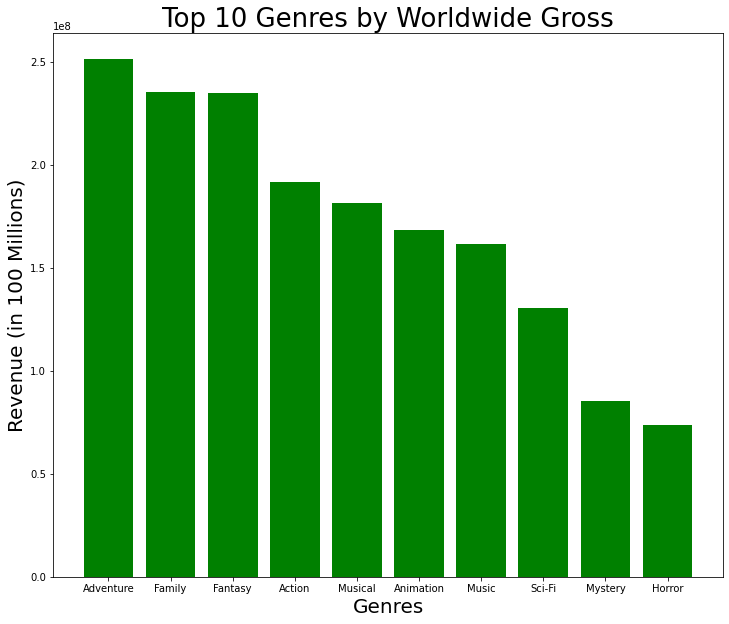

In [76]:
plt.figure(figsize=(12,10))

genres = genre_agg.index
worldwide_gross = genre_agg.worldwide_gross
plt.bar(range(len(genres)), worldwide_gross, color='green')

plt.title('Top 10 Genres by Worldwide Gross', fontsize=26)
plt.ylabel('Revenue (in 100 Millions)', fontsize=20)
plt.xlabel('Genres', fontsize=20)
plt.xticks(range(len(genres)), genres)

In [100]:
genre_net_agg = all_df.groupby(['genre1']).agg('mean')

In [101]:
genre_net_agg = genre_net_agg.sort_values('net_profit', ascending=False).head(10)

In [102]:
genre_net_agg.index

Index(['Family', 'Fantasy', 'Adventure', 'Musical', 'Music', 'Action',
       'Animation', 'Sci-Fi', 'Horror', 'Mystery'],
      dtype='object', name='genre1')

([<matplotlib.axis.XTick at 0x7fe7b34c7250>,
 [Text(0, 0, 'Family'),
  Text(1, 0, 'Fantasy'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Musical'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Mystery')])

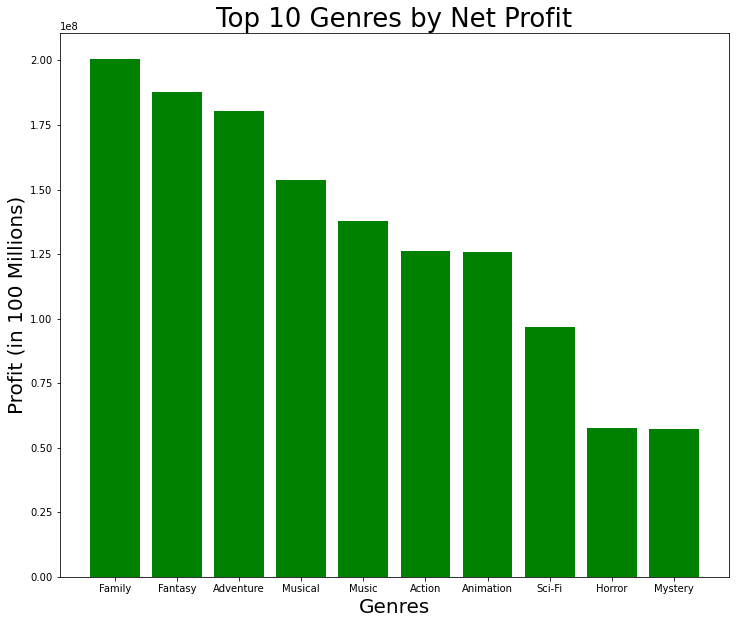

In [104]:
plt.figure(figsize=(12,10))

genres2 = genre_net_agg.index
net_profit = genre_net_agg.net_profit
plt.bar(range(len(genres2)), net_profit, color='green')

plt.title('Top 10 Genres by Net Profit', fontsize=26)
plt.ylabel('Profit (in 100 Millions)', fontsize=20)
plt.xlabel('Genres', fontsize=20)
plt.xticks(range(len(genres2)), genres2)

Below, I'm going to go through some similar steps but look at directors instead. First, I'm going to group by a director's name, and count how many times it occurs in the DataFrame.

In [123]:
director_agg = all_df.groupby(['primary_name']).agg('mean')

Now, I'm going to sort the directors by worldwide_gross and averagerating.

In [131]:
director_agg = director_agg.sort_values(['averagerating'], ascending=False).head(10)

Now I'll look at the index of the new variable I created.

In [132]:
director_agg.index

Index(['Michal Madracki', 'Nicholas Perez', 'Benjamin Jimerson-Phillips',
       'Mariano Cattaneo', 'Steven Esteb', 'Dusan Encinger', 'Don McChesney',
       'Chris Furbee', 'Matthew Diamond', 'Behrouz Boochani'],
      dtype='object', name='primary_name')

Now that I've created the variable, I also want to plot this into a bar graph.

([<matplotlib.axis.XTick at 0x7fe7b30103d0>,
 [Text(0, 0, 'Michal Madracki'),
  Text(1, 0, 'Nicholas Perez'),
  Text(2, 0, 'Benjamin Jimerson-Phillips'),
  Text(3, 0, 'Mariano Cattaneo'),
  Text(4, 0, 'Steven Esteb'),
  Text(5, 0, 'Dusan Encinger'),
  Text(6, 0, 'Don McChesney'),
  Text(7, 0, 'Chris Furbee'),
  Text(8, 0, 'Matthew Diamond'),
  Text(9, 0, 'Behrouz Boochani')])

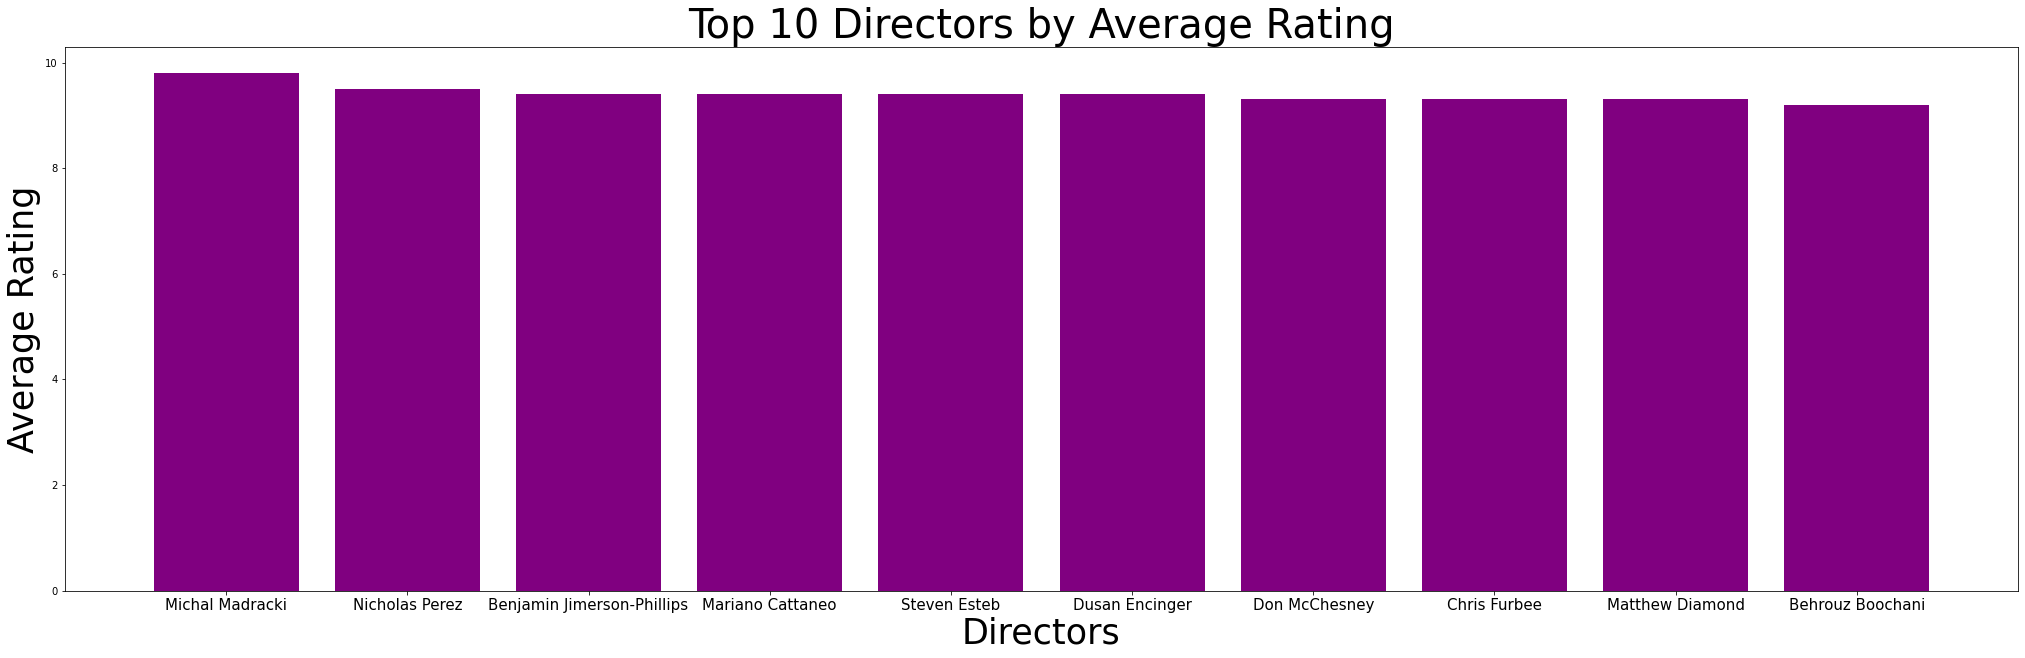

In [133]:
plt.figure(figsize=(35, 10))

directors = director_agg.index
rating = director_agg.averagerating
plt.bar(range(len(directors)), rating, color='purple')

plt.title('Top 10 Directors by Average Rating', fontsize=40)
plt.ylabel('Average Rating', fontsize=35)
plt.xlabel('Directors', fontsize=35)
plt.xticks(range(len(directors)), directors, fontsize=15)

One of the major things I'm comparing as well is how worldwide_gross is impacted by production_budget. I'm going to use a scatter plot for this because there are so many data points.

Text(0, 0.5, 'Net Profit(in Billions)')

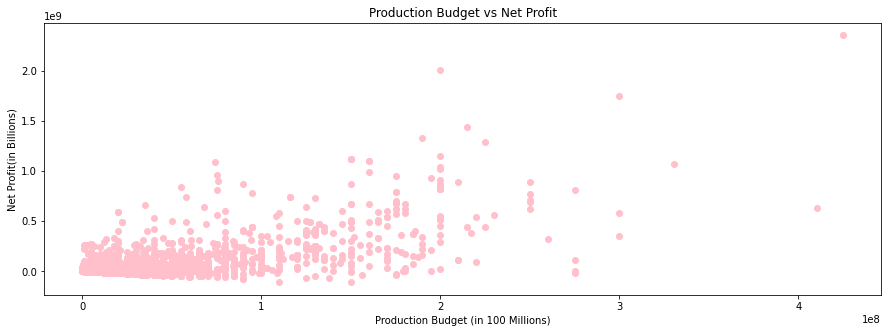

In [130]:
#Set up plot
fig, ax = plt.subplots(figsize=(15,5))
                       
#Plot Net Profit vs Production Budget
ax.scatter(all_df['production_budget'], all_df['net_profit'], alpha=1.0, color='pink')
ax.set_title('Production Budget vs Net Profit')
ax.set_xlabel('Production Budget (in 100 Millions)')
ax.set_ylabel('Net Profit(in Billions)')

***

## Evaluation

Based on these visuals, I am cofident that this could be applied to a larger dataset and generalize that as well. However, this analysis could be made more efficiently by using functions, and it could also be a more thorough evaluation by going through more aspects like actors, runn time, release date, and many more.

***

## Conclusions
**Recommendations*

Based on this analysis, I would recommend that Microsoft create a Family, Fantasy, or Adventure movie with a production budget of at least 200 million, and have it be directed by Michael Madracki, Nicole Perez, or any of the other top ten directors. 

**Limitations*

This data is not the newest data. At the time of this analysis, it's Fall 2022, but a lot of this data is as old as 2019. Along with that, when analyzing genres, some movies had multiple genres, which wasn't evaluated in this analysis. There are some movies that also have multiple directors, which wasn't dissected in this analysis. 

**Lessons Learned*

In the future, I would create more functions throughout the analysis to reduce repition and increase ease of reproduction. I would also be sure to look at all of the files before deciding how I wanted to conduct my analysis. Not only that, but I would look at which DataFrames have primary keys, so I didn't have to join on something other than a primary key.


***